### 데이터 불러오기

In [188]:
# Code origin by KJH3024 at GitHub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore') # 경고 무시
plt.rc("font", family="Malgun Gothic") # 한글 시각화 추가
plt.rc("axes", unicode_minus=False) # 마이너스 부호 깨짐 방지
pd.options.display.max_columns = None

# Load Data
df = pd.read_csv('../../csv_data/use/00_real_true_data.csv', thousands=",", encoding='CP949')
df['회계년도'] = pd.to_datetime(df['회계년도'], format='%Y-%m').dt.strftime('%Y')
df.head(3)

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R & D 투자효율,통계청 한국표준산업분류 10차(소분류),매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업1,회생기업2
0,CMG제약,58820,2011,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,-5.58,0.66,3.74,2.29,1.77,11.95,0.97,2.01,1.25,4.61,200.97,165.03,15.10,51.41,7.32,-46.08,-24.07,-213.61,66.05,46.14,56.18,602.31,42.33,33.95,17.88,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78,0.13,의약품 제조업,1,0,0,0,0,0,0.0,0.0
1,CMG제약,58820,2012,-7.75,109.15,-4.12,207.08,75.17,-8.43,28.34,-40.97,-26.84,-9.96,-25.87,-15.78,0.39,4.09,1.75,1.71,7.83,0.66,0.93,0.52,0.81,693.49,649.98,68.81,80.77,0.18,-8.10,-12.71,-2066.51,55.32,77.32,82.49,323.41,21.50,44.68,6.27,7.33,70.60,69458.82,32002.75,426.18,0.000000,0.47,1.66,2009.78,0.74,의약품 제조업,0,0,0,0,1,1,0.0,0.0
2,CMG제약,58820,2013,0.70,-2.09,16.09,-18.89,55.10,25.51,38.70,1.45,0.74,1.40,3.88,0.52,0.36,3.30,2.02,2.03,6.20,0.51,1.26,0.48,1.25,694.71,610.74,394.63,14.11,0.00,-39.85,-13.51,0.00,87.63,60.08,68.34,282.72,11.23,12.37,12.09,14.12,58.50,66012.04,33789.62,411.12,77.914703,12.51,34.29,51433.09,0.66,의약품 제조업,0,0,0,0,0,0,0.0,0.0


### 결측치 확인

<AxesSubplot:>

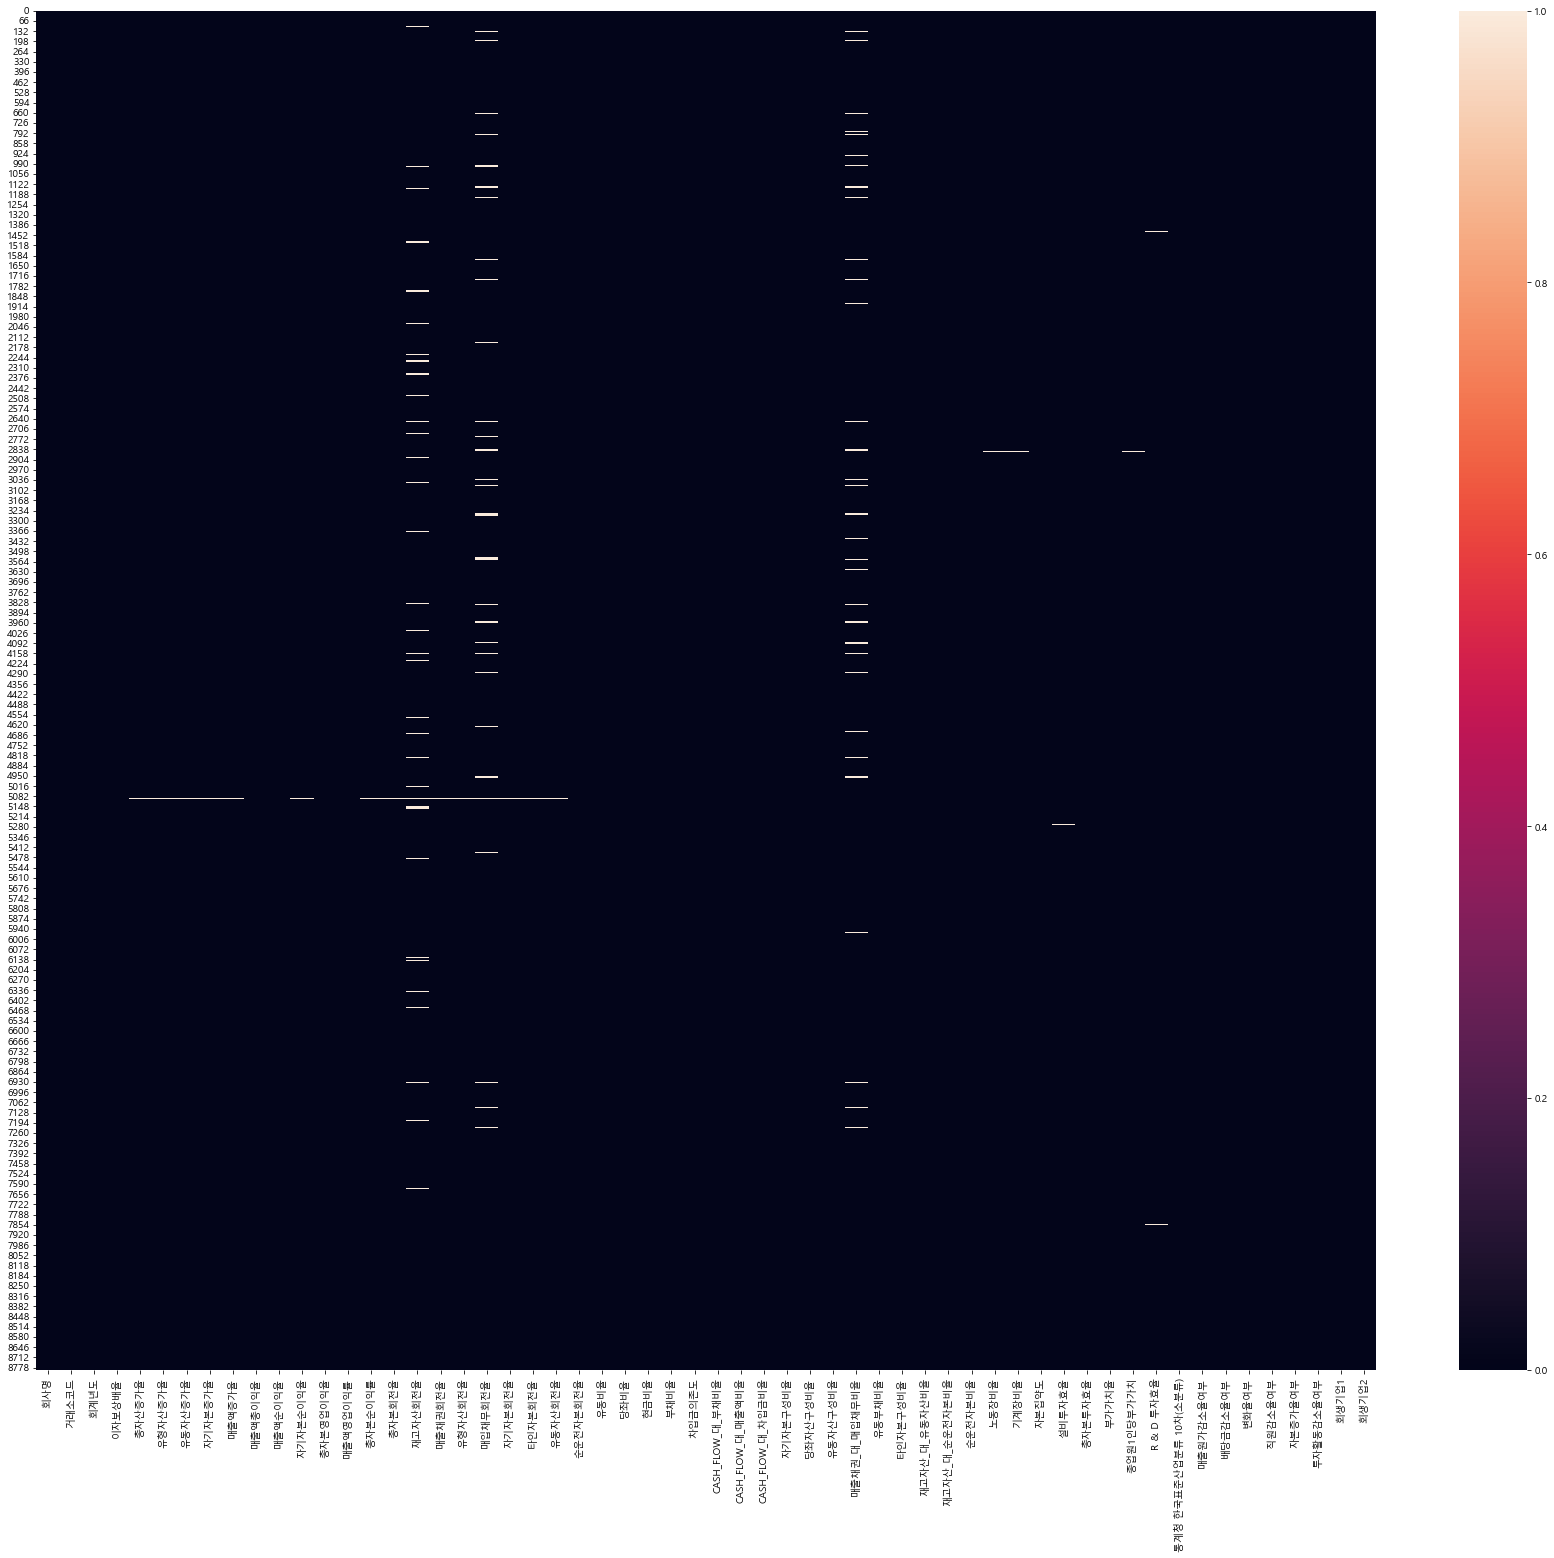

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

### 남은 결측치 평균으로 채워넣고(임시조치) 남는 결측치는 제거

In [190]:
medi = lambda x: x.fillna(x.mean())
df = df.groupby('회사명').apply(medi)
df = df.dropna()
df = df.reset_index(drop=True)
df.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
이자보상배율                   0
총자산증가율                   0
유형자산증가율                  0
유동자산증가율                  0
자기자본증가율                  0
매출액증가율                   0
매출액총이익율                  0
매출액순이익율                  0
자기자본순이익율                 0
총자본영업이익율                 0
매출액영업이익률                 0
총자본순이익률                  0
총자본회전율                   0
재고자산회전율                  0
매출채권회전율                  0
유형자산회전율                  0
매입채무회전율                  0
자기자본회전율                  0
타인자본회전율                  0
유동자산회전율                  0
순운전자본회전율                 0
유동비율                     0
당좌비율                     0
현금비율                     0
부채비율                     0
차입금의존도                   0
CASH_FLOW_대_부채비율         0
CASH_FLOW_대_매출액비율        0
CASH_FLOW_대_차입금비율        0
자기자본구성비율                 0
당좌자산구성비율                 0
유동자산구성비율                 0
매출채권_대_매입채무비율            0
유동부채비율                   0
타

### 아상치 확인

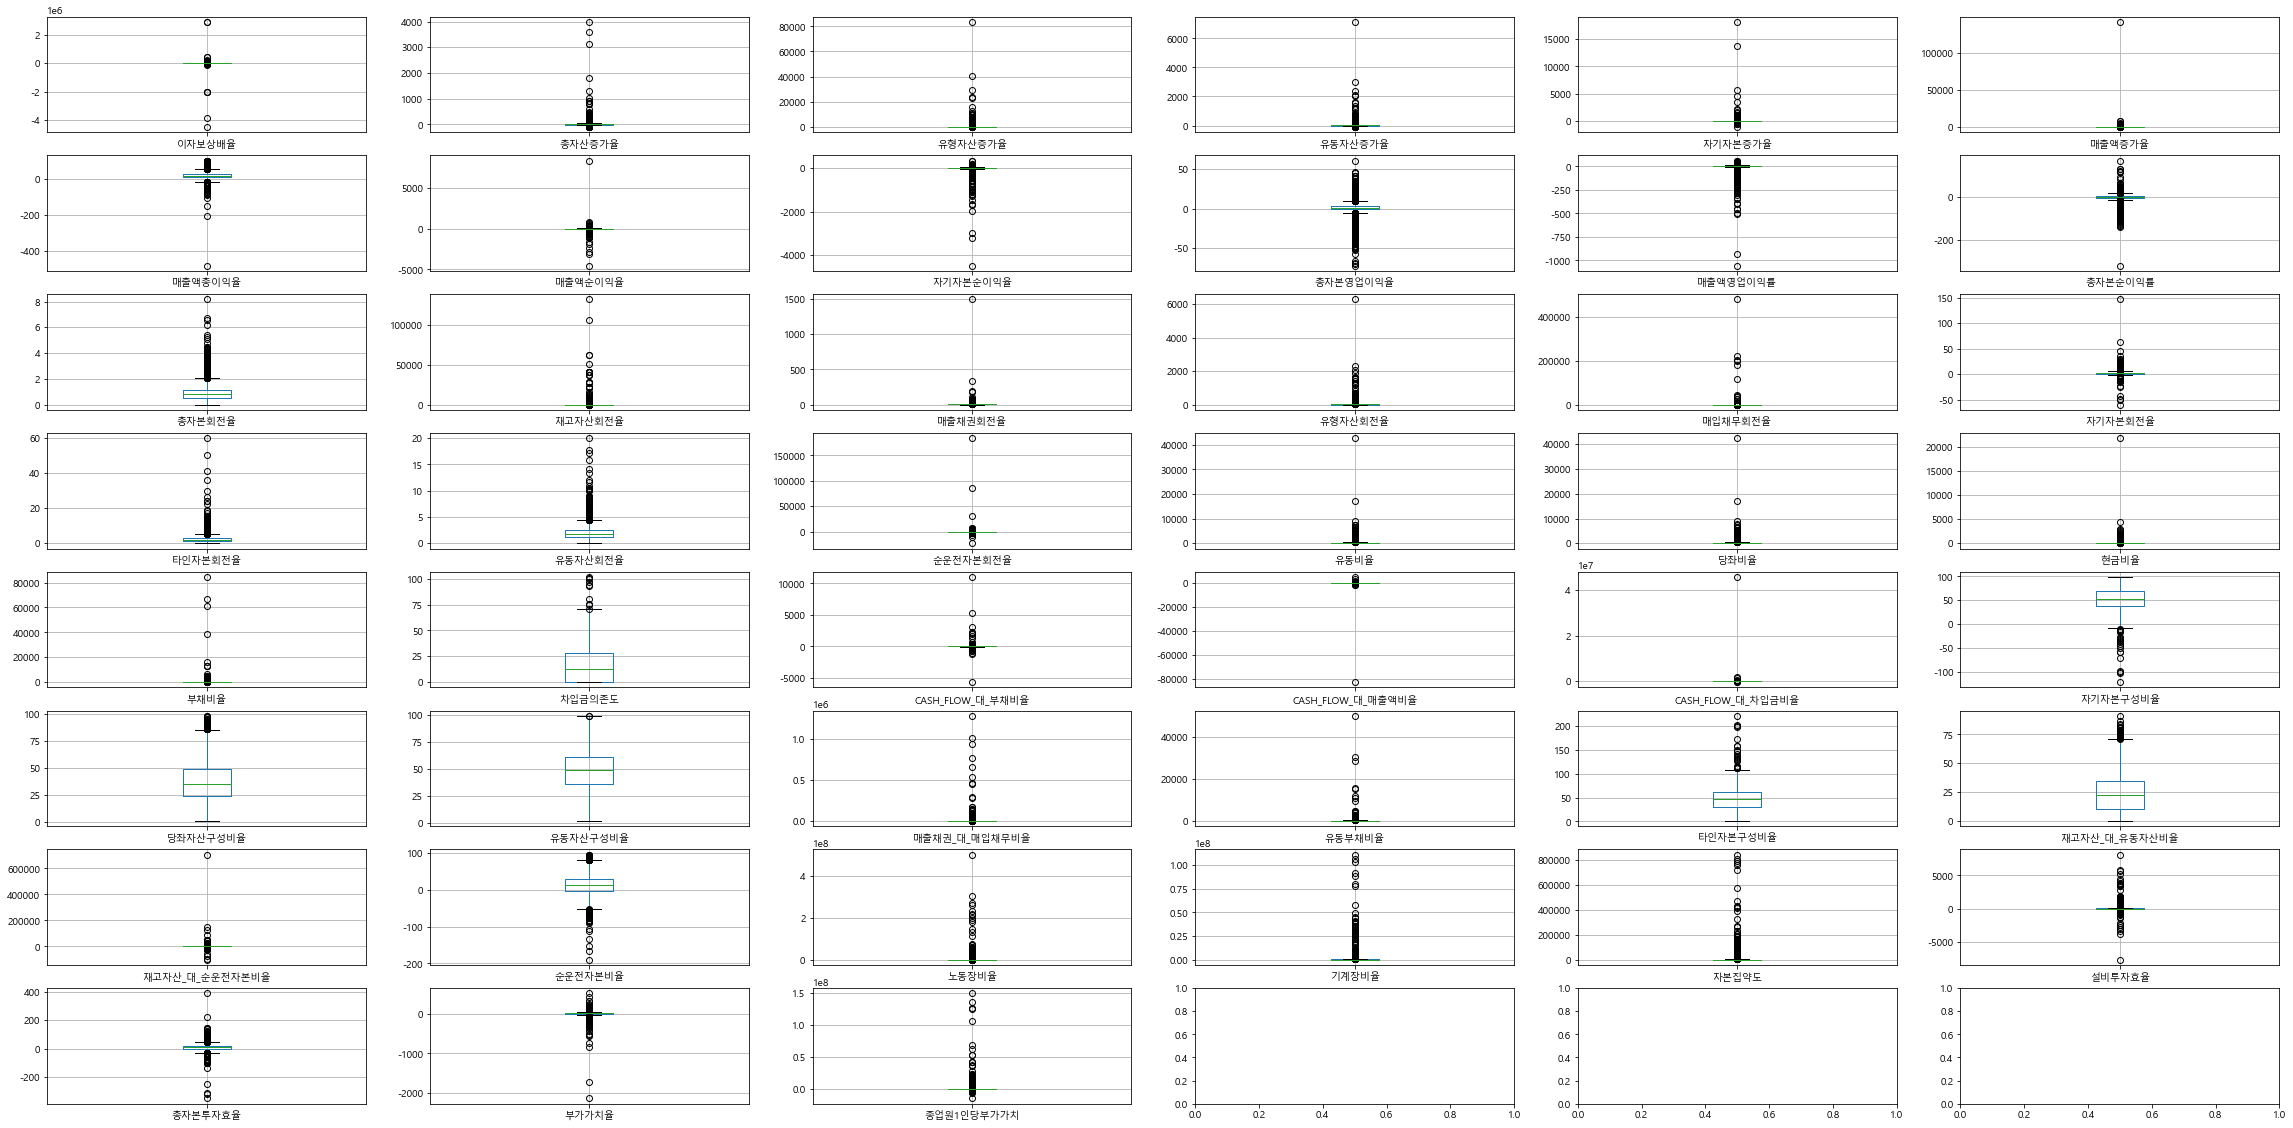

In [191]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df.boxplot(column='이자보상배율', ax=axes[0,0])
df.boxplot(column='총자산증가율', ax=axes[0,1])
df.boxplot(column='유형자산증가율', ax=axes[0,2])
df.boxplot(column='유동자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액증가율', ax=axes[0,5])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본영업이익율', ax=axes[1,3])
df.boxplot(column='매출액영업이익률', ax=axes[1,4])
df.boxplot(column='총자본순이익률', ax=axes[1,5])
df.boxplot(column='총자본회전율', ax=axes[2,0])
df.boxplot(column='재고자산회전율', ax=axes[2,1])
df.boxplot(column='매출채권회전율', ax=axes[2,2])
df.boxplot(column='유형자산회전율', ax=axes[2,3])
df.boxplot(column='매입채무회전율', ax=axes[2,4])
df.boxplot(column='자기자본회전율', ax=axes[2,5])
df.boxplot(column='타인자본회전율', ax=axes[3,0])
df.boxplot(column='유동자산회전율', ax=axes[3,1])
df.boxplot(column='순운전자본회전율', ax=axes[3,2])
df.boxplot(column='유동비율', ax=axes[3,3])
df.boxplot(column='당좌비율', ax=axes[3,4])
df.boxplot(column='현금비율', ax=axes[3,5])
df.boxplot(column='부채비율', ax=axes[4,0])
df.boxplot(column='차입금의존도', ax=axes[4,1])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df.boxplot(column='자기자본구성비율', ax=axes[4,5])
df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df.boxplot(column='유동자산구성비율', ax=axes[5,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df.boxplot(column='유동부채비율', ax=axes[5,3])
df.boxplot(column='타인자본구성비율', ax=axes[5,4])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df.boxplot(column='순운전자본비율', ax=axes[6,1])
df.boxplot(column='노동장비율', ax=axes[6,2])
df.boxplot(column='기계장비율', ax=axes[6,3])
df.boxplot(column='자본집약도', ax=axes[6,4])
df.boxplot(column='설비투자효율', ax=axes[6,5])
df.boxplot(column='총자본투자효율', ax=axes[7,0])
df.boxplot(column='부가가치율', ax=axes[7,1])
df.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

In [192]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율', '통계청 한국표준산업분류 10차(소분류)',
       '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부',
       '회생기업1', '회생기업2'],
      dtype='object')

### 이상치 조정

In [193]:
from scipy.stats.mstats import winsorize
df1 = df.iloc[:, 3:49]
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

# 통계청 ~ 반정형 : df.iloc[:, 49:]

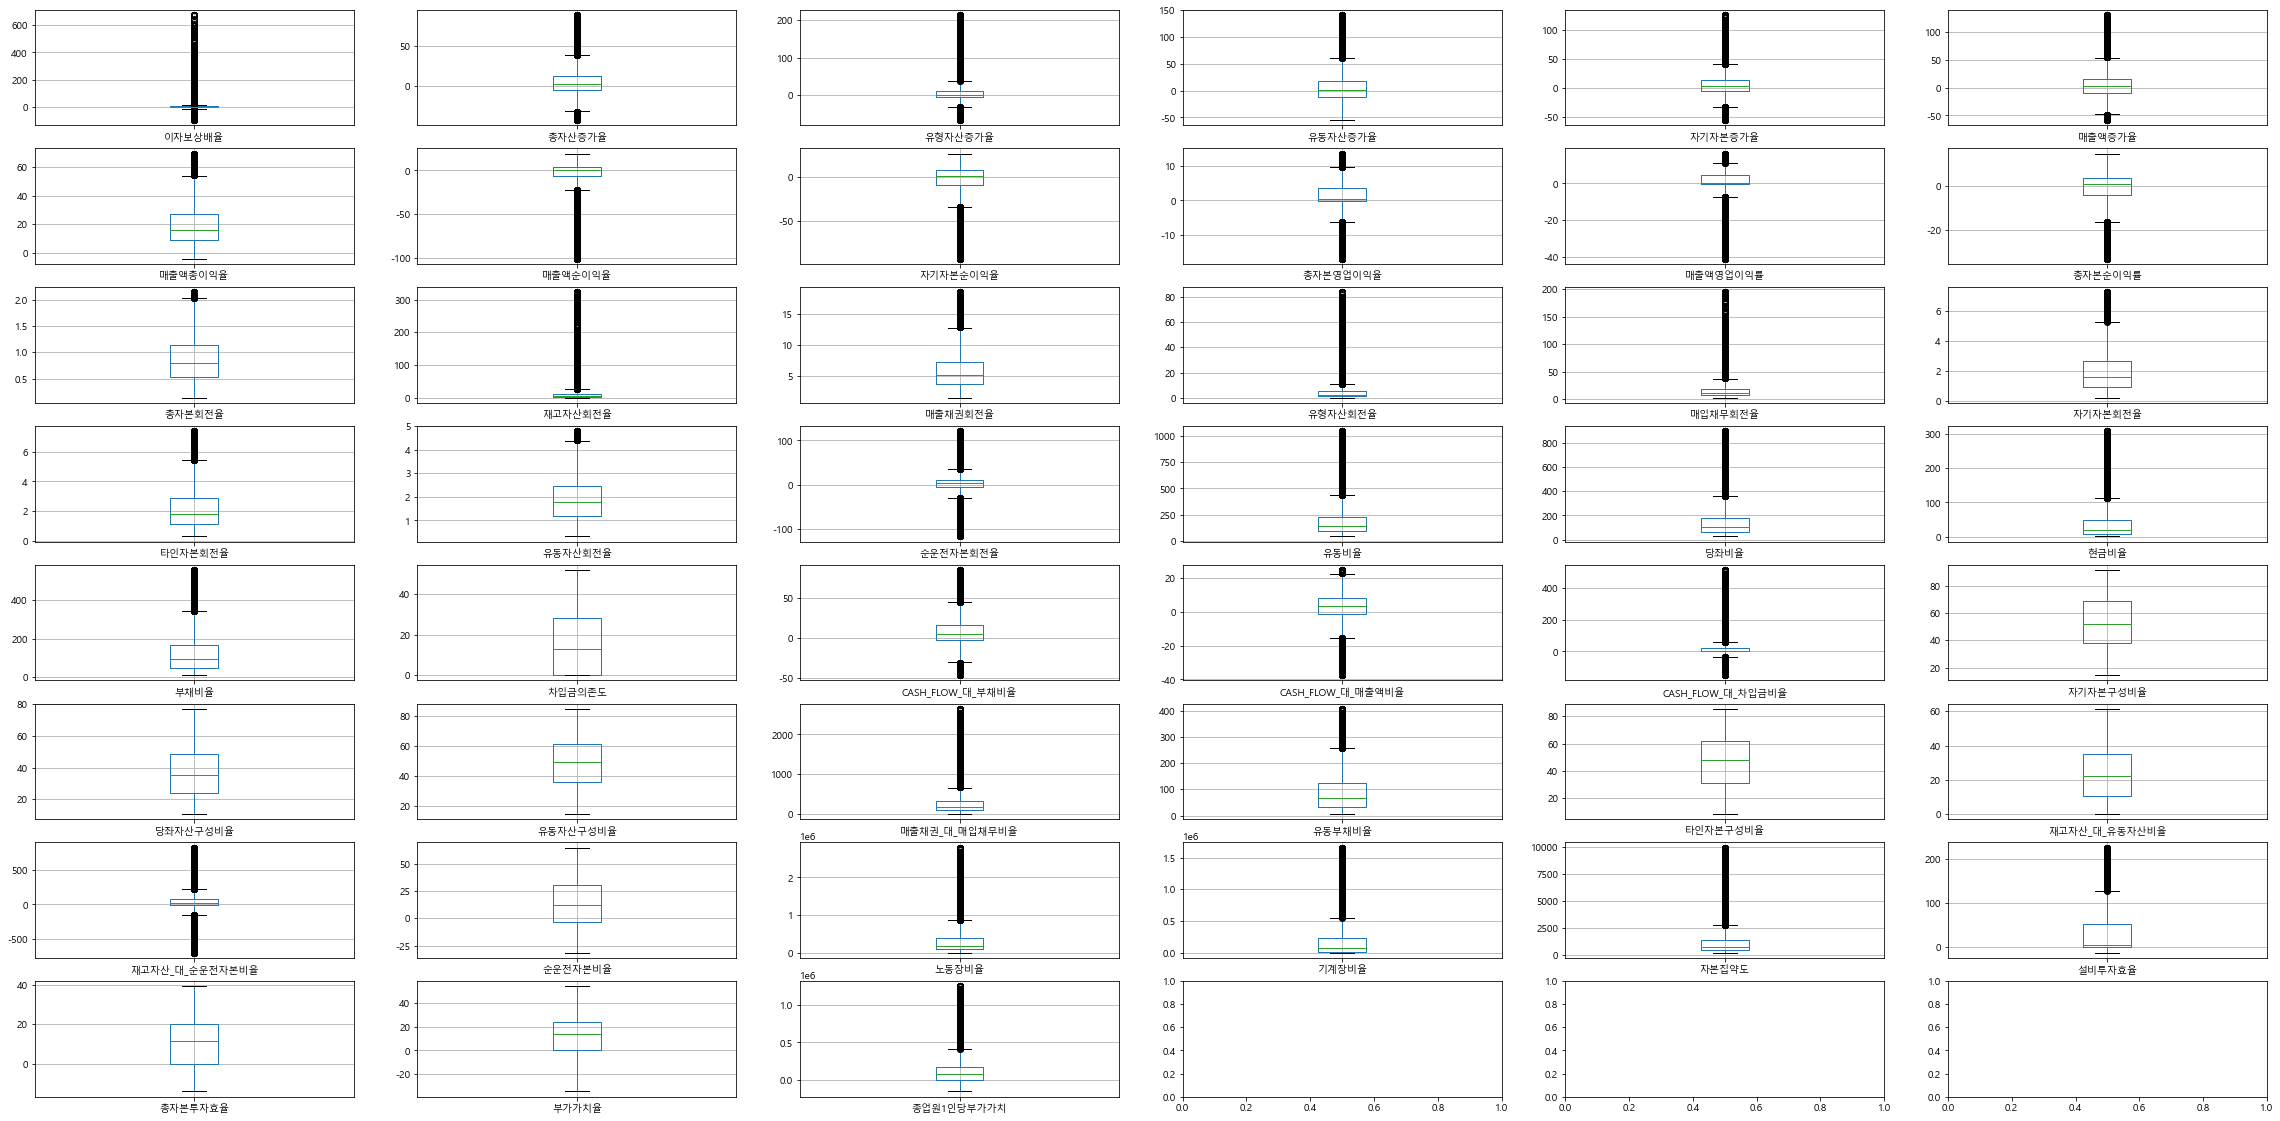

In [194]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

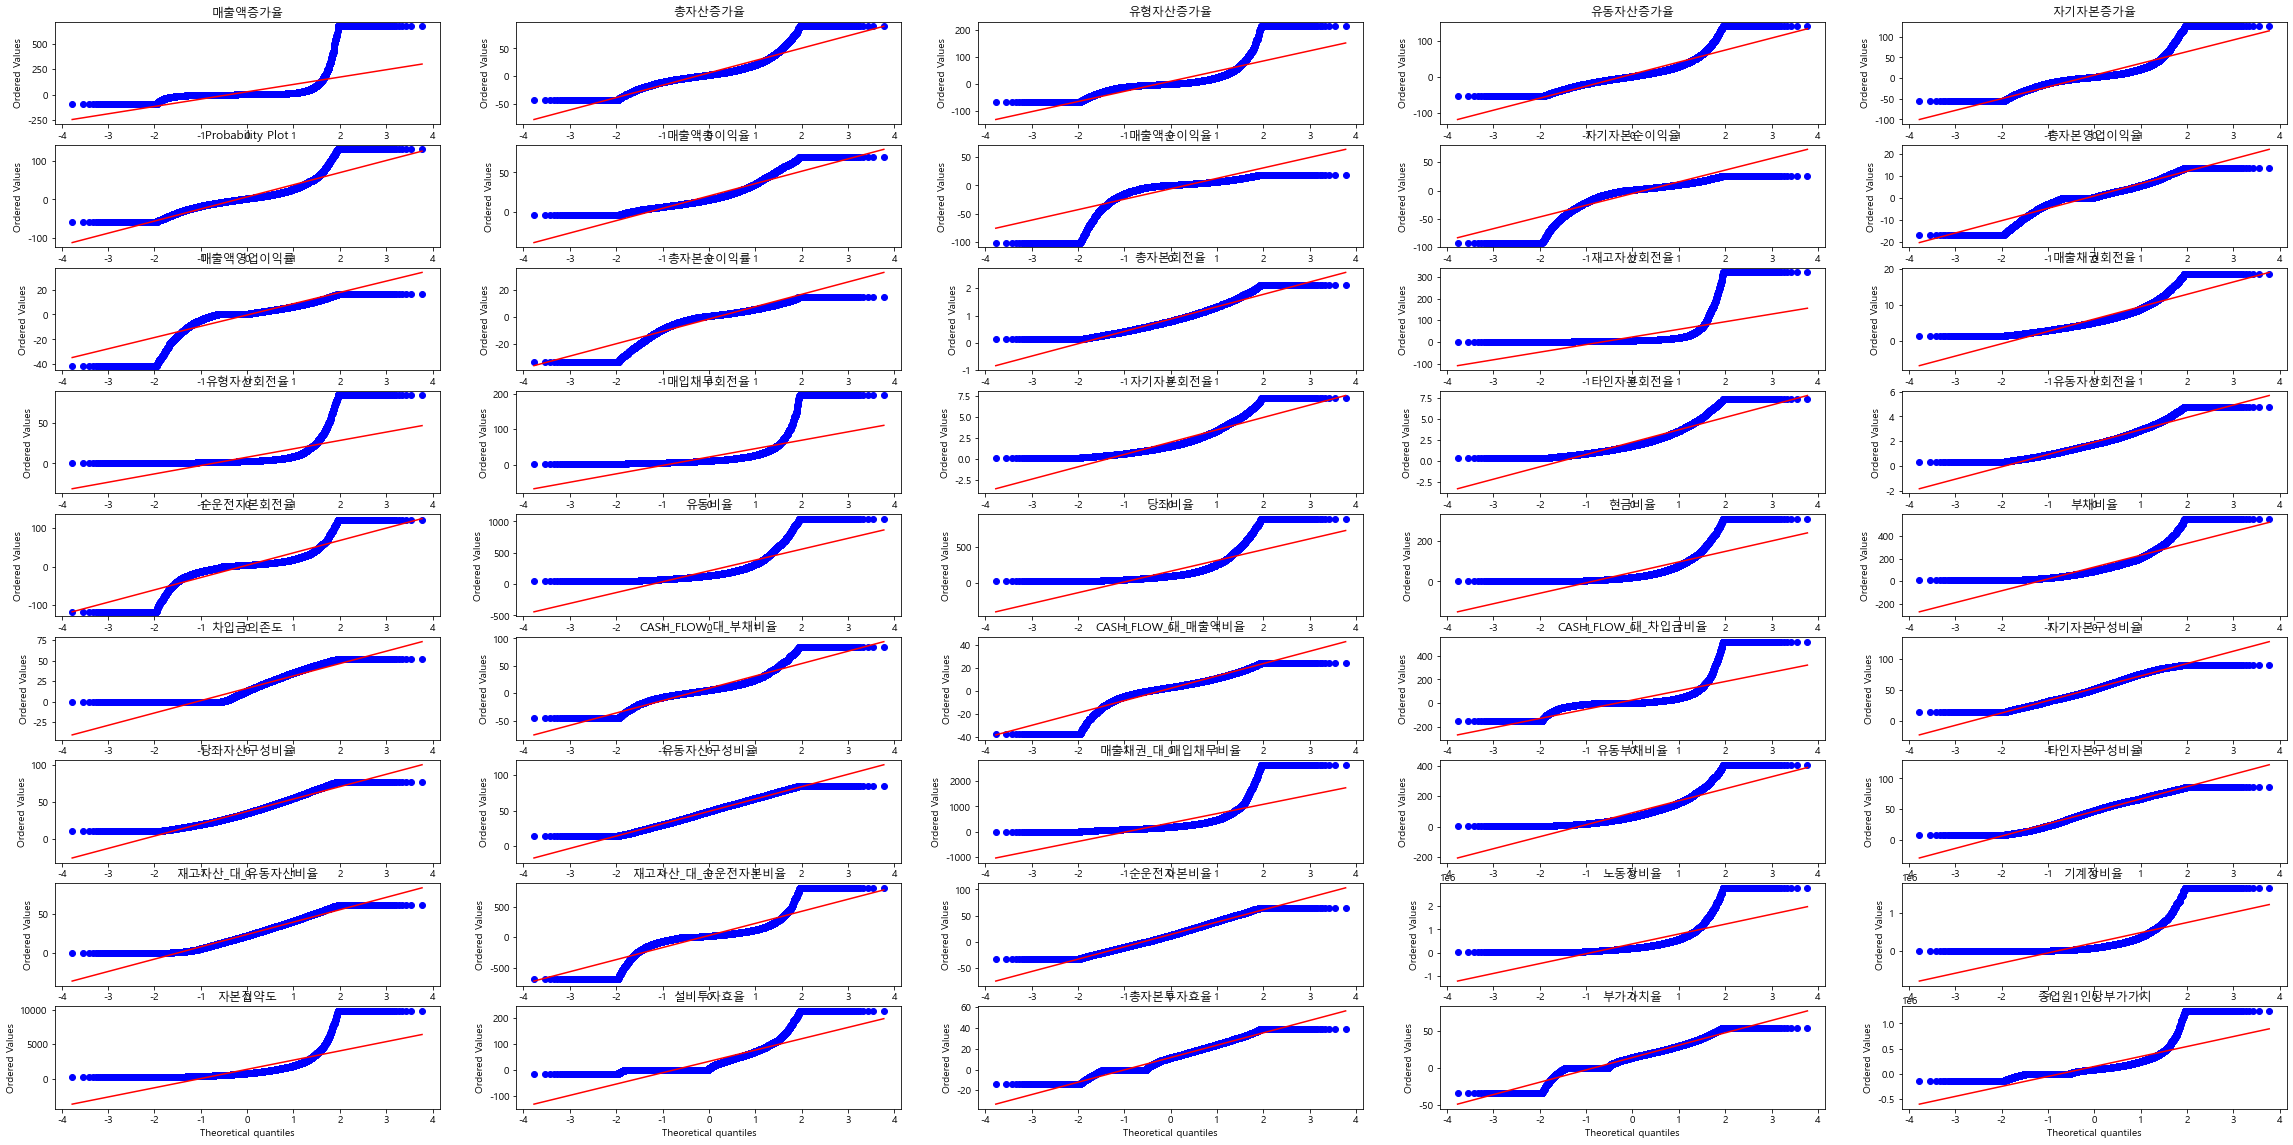

In [195]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")

plt.show()

In [196]:
x = df1[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치']]

### 정규화 하고 정규성 보기

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()

# Standard Scaler
ss_sc = SS.fit_transform(x)
ss_sc2 = pd.DataFrame(ss_sc)

# Robust Scaler
rs_sc = RS.fit_transform(x)
rs_sc2 = pd.DataFrame(rs_sc)

# Min-Max Scaler
mi_sc = MIN.fit_transform(x)
mi_sc2 = pd.DataFrame(mi_sc)

In [198]:
ss_sc2.columns = x.columns
rs_sc2.columns = x.columns
mi_sc2.columns = x.columns

In [199]:
ss_sc2

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치
0,-0.166470,-0.345845,0.279999,-0.290350,1.466269,1.303274,-0.117156,-0.126375,0.265508,0.387024,-0.407697,-0.461977,-0.330999,-1.017556,-0.378772,-0.291481,-0.669896,-0.159400,-0.654366,0.029879,-0.050575,-0.013530,-0.459662,-0.635855,-0.558130,-2.316334,-2.311976,-1.715232,0.632262,0.508111,0.408928,0.510079,-0.574677,-0.632263,-0.359807,0.030629,0.588168,-0.556438,-0.518558,-0.628892,0.050774,0.094236,0.335805,-0.474031
1,3.517836,-0.307246,3.686073,2.167272,-0.445738,0.483225,-1.548675,-0.920806,-1.836260,-2.461845,-1.450836,-1.043344,-0.325025,-1.163939,-0.382633,-0.411332,-0.864605,-0.840120,-1.365987,-0.076348,2.283130,2.624452,0.377841,-0.386255,-1.003011,-0.719589,-1.314177,-1.715232,0.101065,2.342700,1.917775,-0.052255,-0.812307,-0.101065,-1.068138,-0.095457,2.149154,-0.560581,-0.510403,-0.505705,-0.652765,-0.920578,-0.718549,-0.570700
2,-0.337413,0.131001,-0.726748,1.528271,0.555242,1.113003,0.321514,0.259712,0.100162,0.413116,0.216141,-1.107940,-0.338509,-1.090748,-0.362042,-0.458749,-0.958819,-0.632122,-1.404980,-0.064048,2.288911,2.410998,4.124384,-0.952956,-1.014226,-2.058292,-1.384444,-0.265283,1.700597,1.332021,1.106289,-0.134297,-0.929467,-1.700598,-0.713057,-0.065162,1.864189,-0.566878,-0.505174,-0.513990,0.875923,0.076839,1.203438,-0.369195
3,-0.087508,1.393265,-0.920767,-0.225717,0.142640,1.013916,0.288008,0.241734,-0.005523,0.225640,0.191597,-1.021811,-0.343629,-1.136831,-0.393572,-0.485803,-0.990224,0.370049,-1.210015,-0.034137,0.535126,0.547847,0.883523,-0.915635,-1.013603,-1.125627,-0.817912,-1.715232,1.540198,0.161761,-0.017748,-0.129075,-0.854630,-1.540199,-0.391532,-0.016218,0.819597,-0.479387,-0.462182,-0.545370,0.088922,0.047844,1.012005,-0.403345
4,-0.360513,-0.334352,-0.403751,-0.368673,0.358821,0.964677,-0.337593,-0.098125,-0.903845,-0.880858,-0.488489,-0.871087,-0.338167,-1.071772,-0.397433,-0.474458,-0.927414,0.388958,-0.907820,-0.012332,0.403733,0.368228,-0.242919,-0.896252,-1.013603,0.301620,0.311638,4.720153,1.461484,-0.042739,-0.147929,-0.190813,-0.841853,-1.461485,-0.183486,0.011577,0.697349,-0.478753,-0.447822,-0.540798,-0.652765,-0.327430,0.123756,-0.466110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.325359,0.762024,-0.583163,0.021032,0.014347,-0.898518,0.355462,0.714712,0.379716,0.255597,0.470790,1.023738,0.567993,2.381776,-0.298339,-0.142540,1.930417,-0.266550,2.786760,-0.663396,-0.693657,-0.586820,-0.568969,1.374038,0.798320,-0.258316,-0.051996,-0.195530,-1.361335,-0.942302,-1.457776,-0.570535,0.545023,1.361336,-0.925984,-0.200171,-1.132584,0.095202,-0.604016,-0.267087,-0.105844,0.191161,-0.172523,-0.092010
8588,0.671445,0.852449,-0.514265,-0.118103,-0.125743,-0.862652,0.312256,0.492562,0.364375,0.280723,0.312273,0.636161,0.701468,3.024234,-0.358181,-0.172212,1.836203,-0.455639,2.786760,-0.473304,-0.756818,-0.652640,-0.574115,1.965393,0.513571,-0.260846,-0.019498,-0.179901,-1.555397,-1.287470,-1.825955,-0.582471,0.672565,1.555399,-0.936356,-0.168761,-1.273802,0.397687,-0.604019,-0.204476,-0.231052,0.126544,-0.093005,-0.058385
8589,0.635745,0.624327,-0.897341,0.131193,-0.243713,-0.966602,0.166767,-0.174315,-0.024273,0.106776,-0.037485,0.162454,0.525834,3.064896,-0.400007,-0.166103,1.578684,-0.669940,2.786760,-0.395870,-0.802400,-0.734345,-0.609979,2.310378,0.171499,-0.288674,-0.025646,-0.179226,-1.643518,-1.584763,-1.960725,-0.565756,0.475776,1.643519,-0.376890,-0.179335,-1.290664,0.603970,-0.604025,-0.180369,-0.342521,-0.049909,-0.070622,-0.123176
8590,-0.729700,-

In [200]:
rs_sc2

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치
0,-0.025778,-0.333987,0.548406,-0.265783,2.125295,1.455973,-0.875265,-0.586176,0.525253,0.703724,-0.775799,-0.233333,-0.299890,-0.770889,-0.265092,0.022606,-0.344828,0.105263,-0.406250,0.019385,0.465883,0.532129,-0.136038,-0.341636,-0.201638,-2.762006,-2.870477,-6.508878,0.450822,0.437398,0.281584,1.849090,-0.261379,-0.450822,-0.174564,0.152322,0.462895,-0.391942,-0.219188,-0.601154,0.605893,0.063723,0.232447,-0.344825
1,4.889885,-0.234323,4.795121,3.908341,-0.421053,0.699383,-3.937751,-1.706610,-2.588384,-5.660011,-2.028870,-0.683333,-0.261513,-0.916442,-0.280840,-0.316071,-0.522989,-0.526316,-0.976562,-0.214462,4.071711,4.596325,1.157166,-0.094794,-0.453113,-0.741195,-1.679077,-6.508878,0.104805,1.703303,1.323564,0.592897,-0.490671,-0.104805,-0.657107,-0.154493,1.569838,-0.399229,-0.206319,-0.360825,-0.092063,-0.550928,-0.514554,-0.487117
2,-0.253853,0.897256,-0.706812,2.823036,0.912019,1.280426,0.063193,-0.041654,0.280303,0.762008,-0.026413,-0.733333,-0.348136,-0.843666,-0.196850,-0.450062,-0.609195,-0.333333,-1.007812,-0.187385,4.080643,4.267468,6.942274,-0.655233,-0.459452,-2.435432,-1.762979,0.000000,1.146727,1.005914,0.763168,0.409625,-0.603721,-1.146727,-0.415212,-0.080775,1.367760,-0.410306,-0.198066,-0.376989,1.424496,0.053186,0.847157,-0.190511
3,0.079574,4.156495,-0.948716,-0.156009,0.362529,1.189007,-0.008489,-0.067009,0.123737,0.343227,-0.055897,-0.666667,-0.381031,-0.889488,-0.325459,-0.526510,-0.637931,0.596491,-0.851562,-0.121538,1.370854,1.397012,1.938000,-0.618324,-0.459100,-1.255069,-1.086523,-6.508878,1.042244,0.198409,-0.013069,0.421291,-0.531510,-1.042244,-0.196176,0.038325,0.627008,-0.256412,-0.130217,-0.438209,0.643739,0.035625,0.711528,-0.240779
4,-0.284674,-0.304311,-0.304098,-0.398810,0.650432,1.143578,-1.346852,-0.546333,-1.207071,-2.128440,-0.872850,-0.550000,-0.345943,-0.824798,-0.341207,-0.494451,-0.580460,0.614035,-0.609375,-0.073538,1.167838,1.120283,0.198640,-0.599155,-0.459100,0.551227,0.262192,22.379818,0.990971,0.057300,-0.102970,0.283375,-0.519181,-0.990971,-0.054447,0.105963,0.540318,-0.255297,-0.107555,-0.429290,-0.092063,-0.191671,0.082212,-0.333165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.630429,2.526596,-0.527790,0.263080,0.191673,-0.575435,0.135817,0.600060,0.694444,0.410146,0.279484,0.916667,5.475329,2.609164,0.062992,0.443485,2.034483,0.005848,2.351562,-1.506769,-0.527747,-0.351107,-0.304822,1.646047,0.565114,-0.157417,-0.171998,0.313123,-0.847791,-0.563418,-1.007525,-0.564882,0.819032,0.847791,-0.560266,-0.409304,-0.757343,0.754274,-0.354057,0.104698,0.450519,0.122428,-0.127700,0.217494
8588,1.092183,2.760078,-0.441886,0.026768,0.005106,-0.542344,0.043386,0.286749,0.671717,0.466271,0.089066,0.616667,6.332785,3.247978,-0.181102,0.359638,1.948276,-0.169591,2.351562,-1.088308,-0.625339,-0.452513,-0.312767,2.230868,0.404156,-0.160619,-0.133193,0.383283,-0.974202,-0.801591,-1.261782,-0.591546,0.942099,0.974202,-0.567332,-0.332872,-0.857484,1.286335,-0.354062,0.226848,0.326304,0.083292,-0.071362,0.266988
8589,1.044550,2.171053,-0.919509,0.450183,-0.152003,-0.638250,-0.267861,-0.653788,0.095960,0.077712,-0.331081,0.250000,5.204496,3.288410,-0.351706,0.376901,1.712644,-0.368421,2.351562,-0.917846,-0.695768,-0.578390,-0.368145,2.572041,0.210795,-0.195838,-0.140535,0.386314,-1.031603,-1.006729,-1.354851,-0.554207,0.752215,1.031603,-0.186201,-0.358603,-0.869442,1.649181,-0.354071,0.273879,0.215719,-0.023583,-0.055503,0.171618
8590,-0.777249,-0.927492,0.398935,-2.280654

In [201]:
mi_sc2

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치
0,0.337412,0.214832,0.369374,0.295795,0.608046,0.626131,0.768519,0.709587,0.632010,0.779407,0.577059,0.260,0.010006,0.049563,0.015687,0.044957,0.109220,0.239716,0.206742,0.509548,0.158006,0.157984,0.046603,0.076656,0.140742,0.000000,0.215449,0.000000,0.670013,0.532882,0.590961,0.225017,0.090028,0.329987,0.290543,0.482825,0.617735,0.024062,0.017629,0.000778,0.204250,0.502538,0.611243,0.129436
1,1.000000,0.221160,1.000000,0.722330,0.263499,0.441185,0.497959,0.552672,0.227616,0.264921,0.365484,0.125,0.011094,0.018076,0.014963,0.023395,0.065248,0.086525,0.042697,0.493529,0.648466,0.714451,0.220788,0.130306,0.003461,0.289128,0.398645,0.000000,0.530117,1.000000,0.967248,0.119178,0.038153,0.469883,0.101885,0.464064,1.000000,0.023249,0.019310,0.023830,0.054542,0.272232,0.408777,0.112574
2,0.306670,0.293007,0.182978,0.611427,0.443878,0.583219,0.851429,0.785847,0.600197,0.784119,0.703588,0.110,0.008639,0.033819,0.018825,0.014864,0.043972,0.133333,0.033708,0.495384,0.649681,0.669424,1.000000,0.008497,0.000000,0.046725,0.385744,0.225309,0.951369,0.742664,0.764874,0.103737,0.012577,0.048631,0.196458,0.468572,0.930216,0.022013,0.020388,0.022280,0.379835,0.498590,0.777853,0.147723
3,0.351613,0.499947,0.147056,0.307012,0.369526,0.560872,0.845096,0.782296,0.579862,0.750262,0.698610,0.130,0.007706,0.023907,0.012912,0.009996,0.036879,0.358865,0.078652,0.499895,0.281099,0.276403,0.325961,0.016519,0.000192,0.215605,0.489760,0.000000,0.909126,0.444695,0.484554,0.104720,0.028914,0.090874,0.282093,0.475854,0.674409,0.039180,0.029253,0.016408,0.212367,0.492010,0.741093,0.141766
4,0.302515,0.216716,0.242780,0.282201,0.408482,0.549767,0.726856,0.715167,0.407019,0.550436,0.560672,0.165,0.008701,0.037901,0.012188,0.012037,0.051064,0.363121,0.148315,0.503183,0.253485,0.238514,0.091682,0.020685,0.000192,0.474042,0.697146,1.000000,0.888396,0.392626,0.452088,0.093100,0.031703,0.111604,0.337504,0.479990,0.644472,0.039304,0.032213,0.017263,0.054542,0.406843,0.570524,0.130818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.425863,0.396459,0.209562,0.349837,0.346407,0.129559,0.857845,0.875719,0.653985,0.755672,0.755238,0.605,0.173674,0.780758,0.030771,0.071754,0.696454,0.215603,1.000000,0.405008,0.022854,0.037052,0.023869,0.508671,0.559316,0.372652,0.630382,0.236148,0.144980,0.163582,0.125429,0.021631,0.334462,0.855020,0.139747,0.448482,0.196346,0.151918,0.000009,0.068483,0.170923,0.524535,0.513630,0.196074
8588,0.488103,0.411284,0.222319,0.325689,0.321163,0.137647,0.849679,0.831840,0.651033,0.760209,0.723086,0.515,0.197974,0.918950,0.019549,0.066415,0.675177,0.173050,1.000000,0.433672,0.009580,0.023167,0.022799,0.635779,0.471448,0.372194,0.636349,0.238576,0.093872,0.075696,0.033610,0.019384,0.362305,0.906128,0.136984,0.453156,0.161763,0.211267,0.000009,0.080200,0.144280,0.509870,0.528899,0.201940
8589,0.481683,0.373885,0.151393,0.368956,0.299904,0.114203,0.822181,0.700118,0.576255,0.728796,0.652147,0.405,0.165999,0.927697,0.011705,0.067515,0.617021,0.124823,1.000000,0.445348,0.000000,0.005932,0.015340,0.709931,0.365891,0.367155,0.635220,0.238681,0.070665,0.000000,0.000000,0.022530,0.319346,0.929335,0.285993,0.451583,0.157634,0.251741,0.000007,0.084711,0.120560,0.469825,0.533198,0.190638
8590,0.236121,0.177148,0.347178,0.089904,0.311278,0.081300,0.766103,0.377832,0.506724,0.689005,0.524165,0.395,0.132532,0.826239,0.010740,0.062961,0.739007,0.113475,1.000000,0.456182,0.000000,0.002559,0.017642,1.000000,0.440300,0.346618,0.595549,0.222116,0.000000,0.

### 스탠다드 정규화

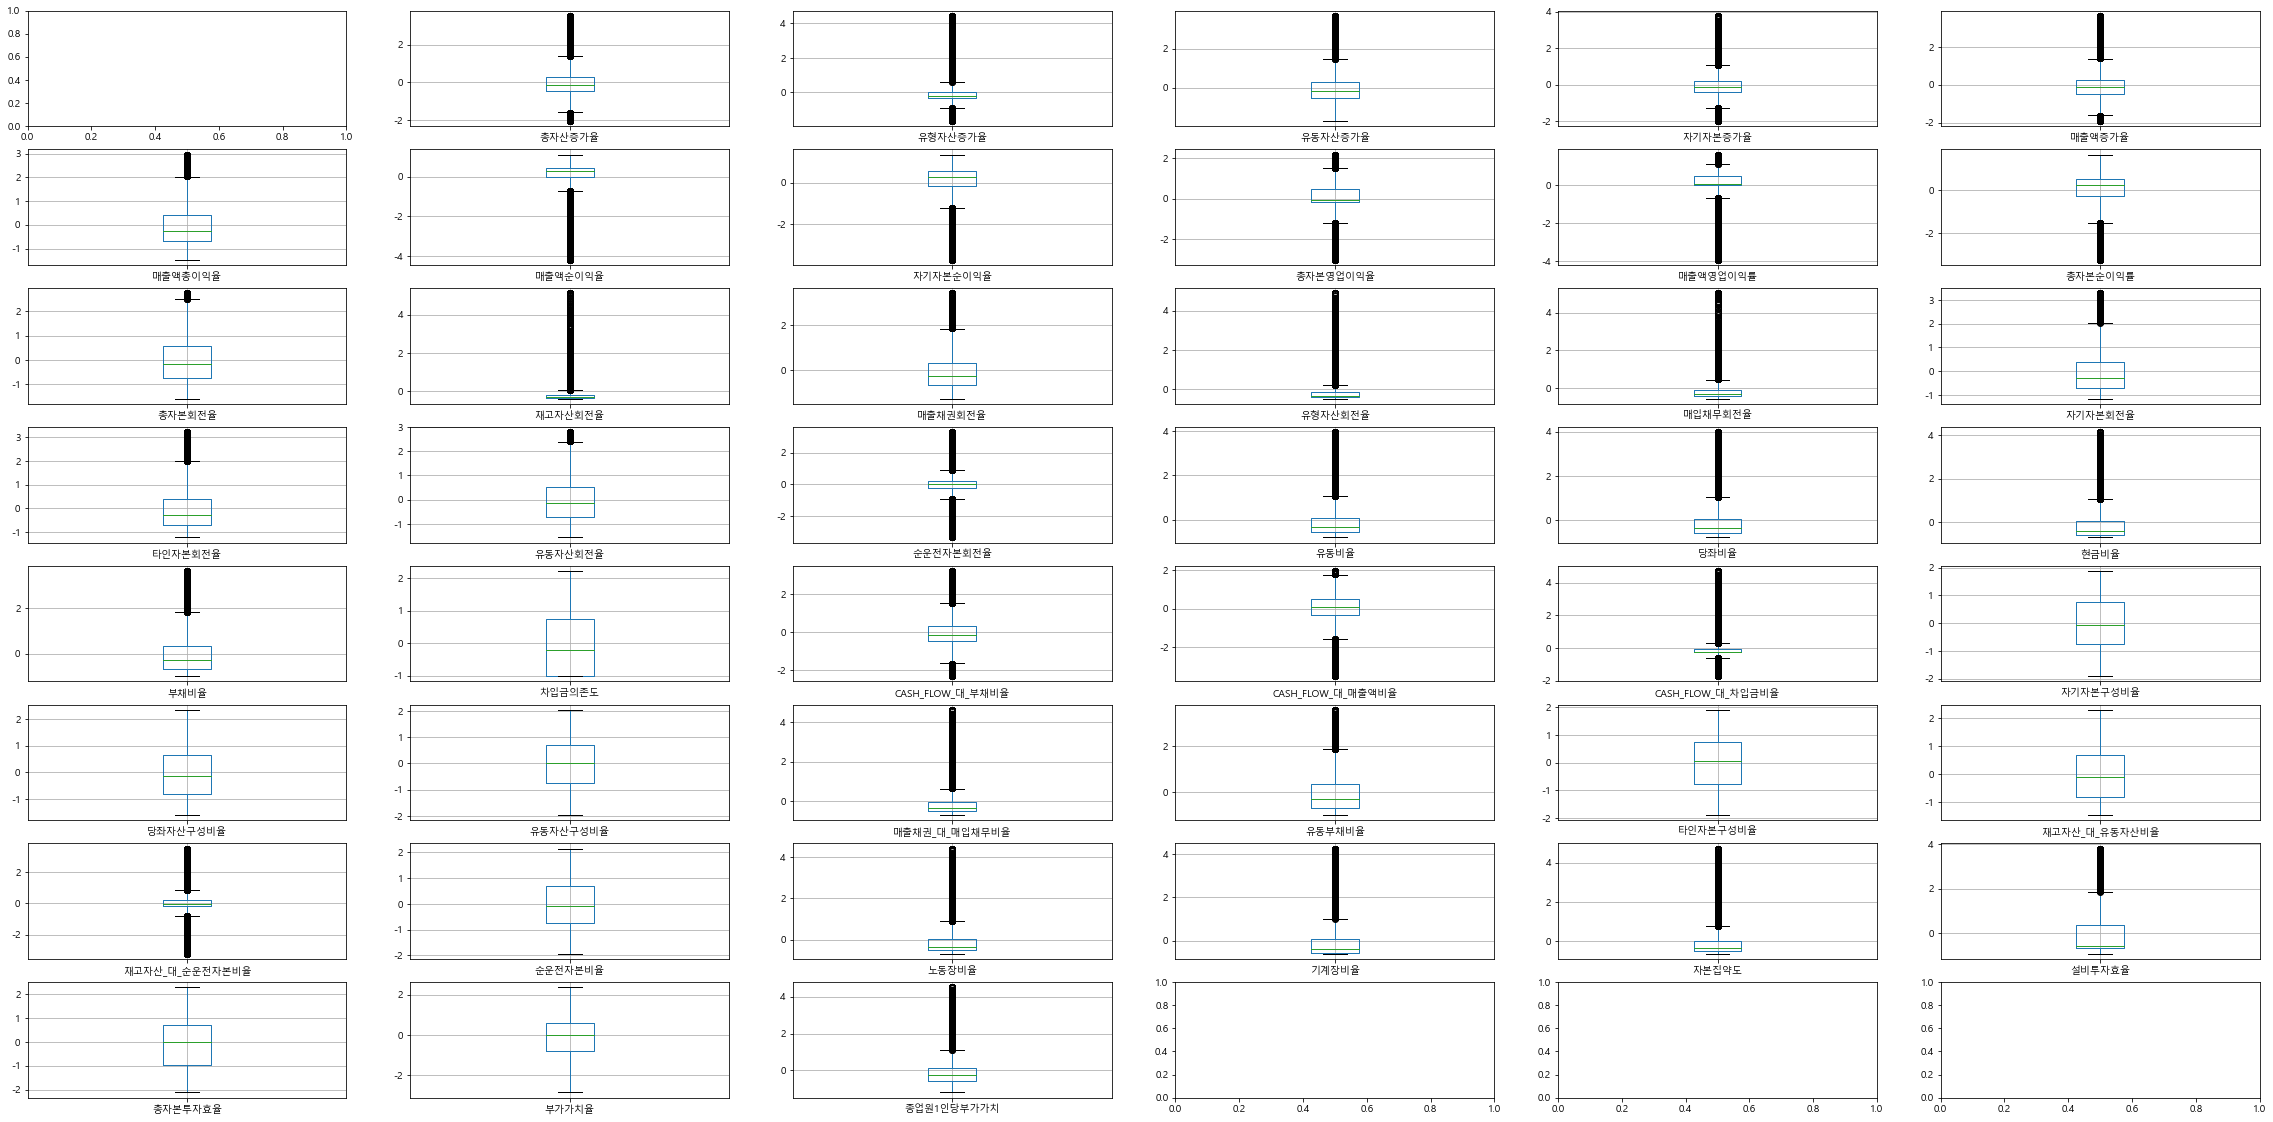

In [202]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

#ss_sc2.boxplot(column='이자보상배율', ax=axes[0,0])
ss_sc2.boxplot(column='총자산증가율', ax=axes[0,1])
ss_sc2.boxplot(column='유형자산증가율', ax=axes[0,2])
ss_sc2.boxplot(column='유동자산증가율', ax=axes[0,3])
ss_sc2.boxplot(column='자기자본증가율', ax=axes[0,4])
ss_sc2.boxplot(column='매출액증가율', ax=axes[0,5])
ss_sc2.boxplot(column='매출액총이익율', ax=axes[1,0])
ss_sc2.boxplot(column='매출액순이익율', ax=axes[1,1])
ss_sc2.boxplot(column='자기자본순이익율', ax=axes[1,2])
ss_sc2.boxplot(column='총자본영업이익율', ax=axes[1,3])
ss_sc2.boxplot(column='매출액영업이익률', ax=axes[1,4])
ss_sc2.boxplot(column='총자본순이익률', ax=axes[1,5])
ss_sc2.boxplot(column='총자본회전율', ax=axes[2,0])
ss_sc2.boxplot(column='재고자산회전율', ax=axes[2,1])
ss_sc2.boxplot(column='매출채권회전율', ax=axes[2,2])
ss_sc2.boxplot(column='유형자산회전율', ax=axes[2,3])
ss_sc2.boxplot(column='매입채무회전율', ax=axes[2,4])
ss_sc2.boxplot(column='자기자본회전율', ax=axes[2,5])
ss_sc2.boxplot(column='타인자본회전율', ax=axes[3,0])
ss_sc2.boxplot(column='유동자산회전율', ax=axes[3,1])
ss_sc2.boxplot(column='순운전자본회전율', ax=axes[3,2])
ss_sc2.boxplot(column='유동비율', ax=axes[3,3])
ss_sc2.boxplot(column='당좌비율', ax=axes[3,4])
ss_sc2.boxplot(column='현금비율', ax=axes[3,5])
ss_sc2.boxplot(column='부채비율', ax=axes[4,0])
ss_sc2.boxplot(column='차입금의존도', ax=axes[4,1])
ss_sc2.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
ss_sc2.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
ss_sc2.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
ss_sc2.boxplot(column='자기자본구성비율', ax=axes[4,5])
ss_sc2.boxplot(column='당좌자산구성비율', ax=axes[5,0])
ss_sc2.boxplot(column='유동자산구성비율', ax=axes[5,1])
ss_sc2.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
ss_sc2.boxplot(column='유동부채비율', ax=axes[5,3])
ss_sc2.boxplot(column='타인자본구성비율', ax=axes[5,4])
ss_sc2.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
ss_sc2.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
ss_sc2.boxplot(column='순운전자본비율', ax=axes[6,1])
ss_sc2.boxplot(column='노동장비율', ax=axes[6,2])
ss_sc2.boxplot(column='기계장비율', ax=axes[6,3])
ss_sc2.boxplot(column='자본집약도', ax=axes[6,4])
ss_sc2.boxplot(column='설비투자효율', ax=axes[6,5])
ss_sc2.boxplot(column='총자본투자효율', ax=axes[7,0])
ss_sc2.boxplot(column='부가가치율', ax=axes[7,1])
ss_sc2.boxplot(column='종업원1인당부가가치', ax=axes[7,2])

plt.show()

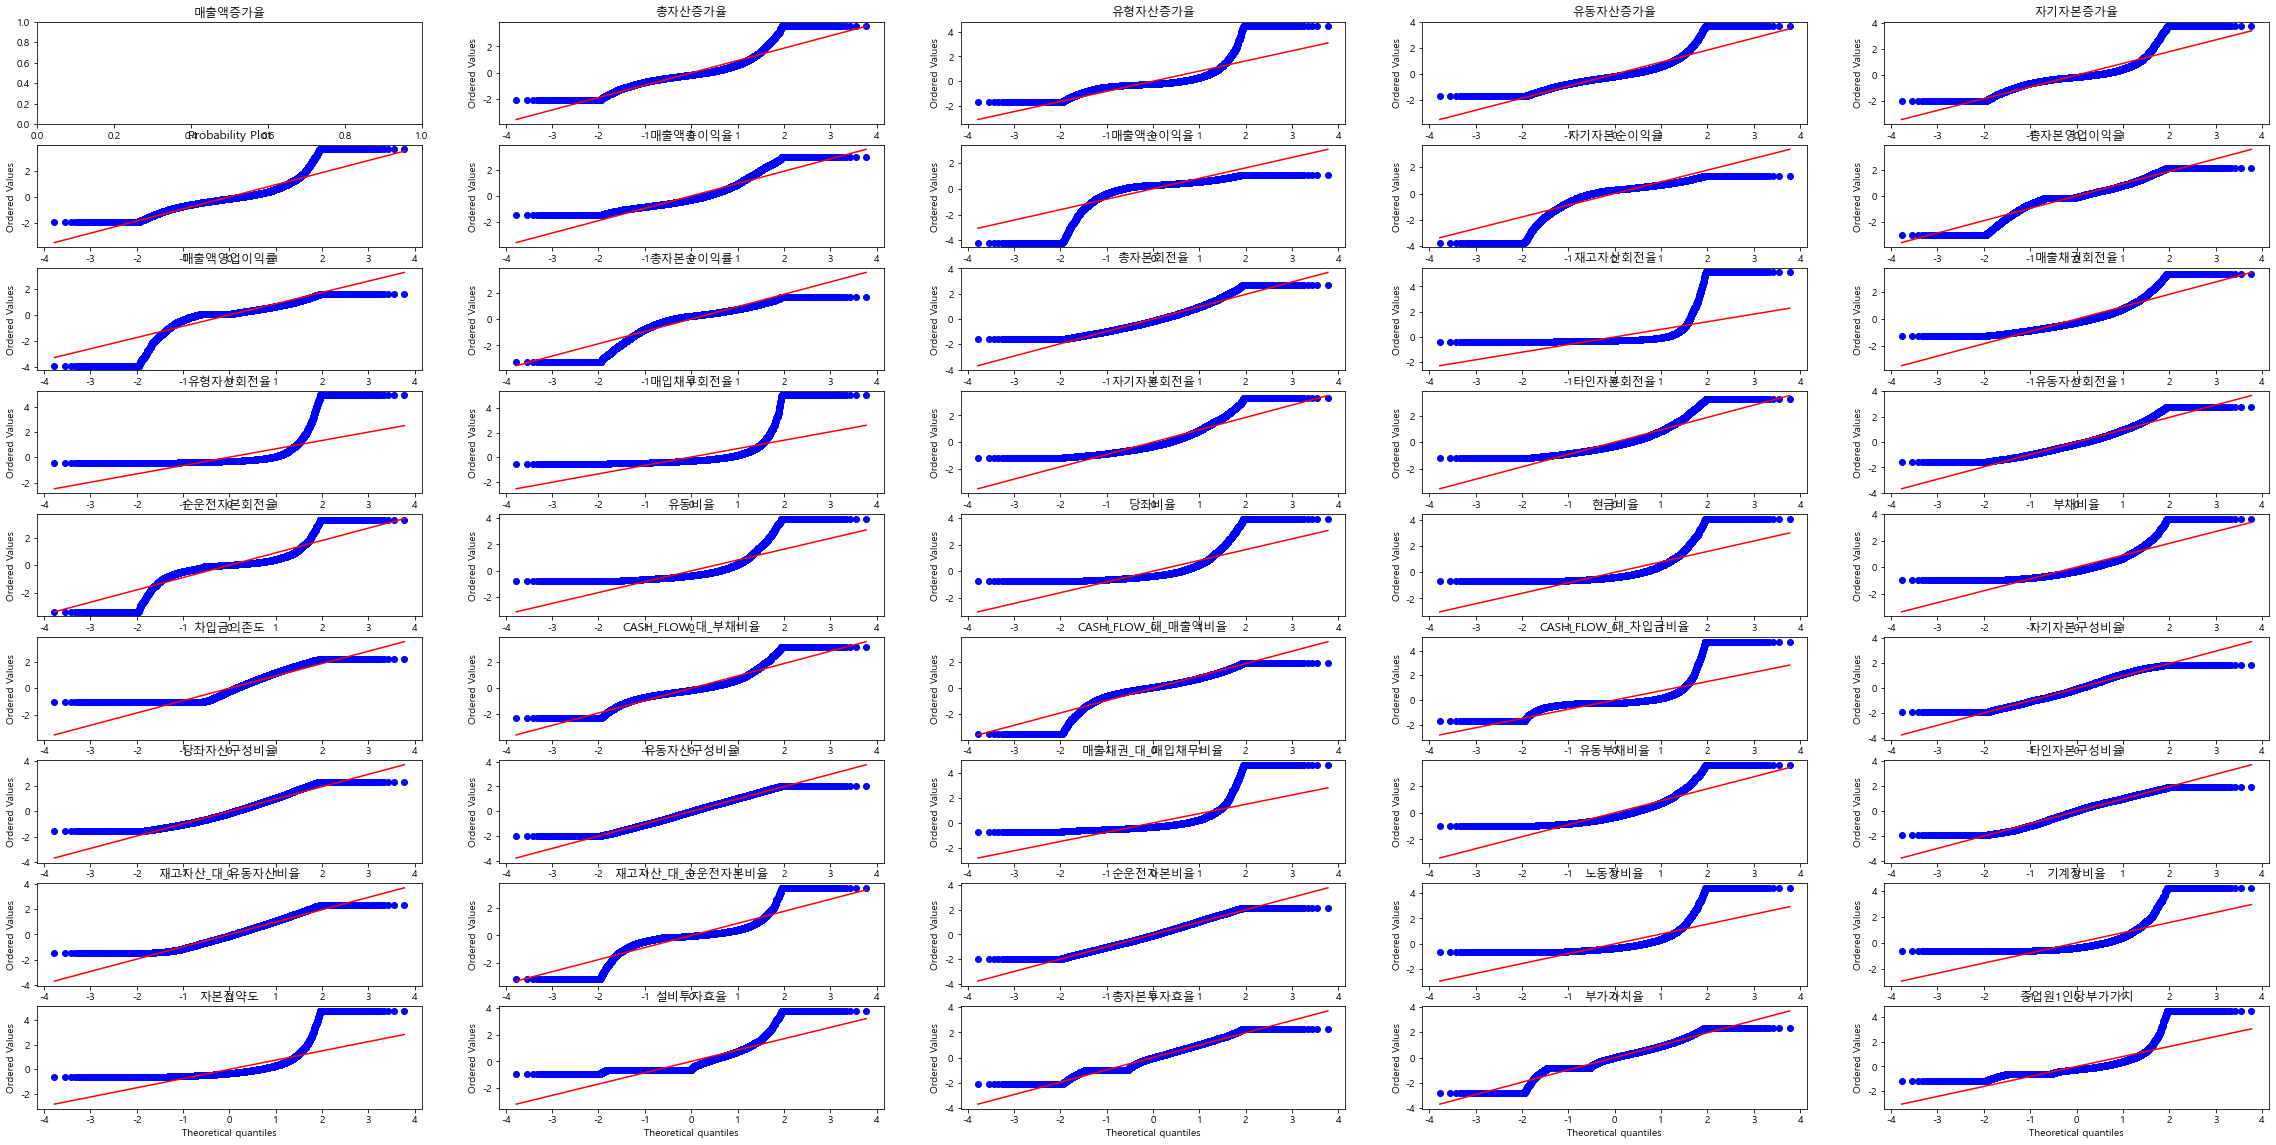

In [203]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(9,5)
fig.set_size_inches((40,20))

#stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(ss_sc2['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(ss_sc2['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(ss_sc2['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(ss_sc2['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(ss_sc2['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")

plt.show()

### 반정형데이터 추가

In [204]:
temp = df.iloc[:, 49:]

# 반정형 데이터에 스케일러를 적용시킬 수는 없으니 나중에 추가합니다
ss_sc2 = pd.concat([ss_sc2,df.iloc[:, 49:56]], axis=1)
ss_sc2.drop(columns=['통계청 한국표준산업분류 10차(소분류)'], inplace=True)

rs_sc2 = pd.concat([rs_sc2,df.iloc[:, 49:56]], axis=1)
rs_sc2.drop(columns=['통계청 한국표준산업분류 10차(소분류)'], inplace=True)

mi_sc2 = pd.concat([mi_sc2,df.iloc[:, 49:56]], axis=1)
mi_sc2.drop(columns=['통계청 한국표준산업분류 10차(소분류)'], inplace=True)

y1 = temp['회생기업1']
y2 = temp['회생기업2']

### 샤피로

In [205]:
# 정규성 검증을 위한 샤피로 지수 구하기

from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [206]:
shap_pct(mi_sc2)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
매출액영업이익률 의 pvalue: 0.0
총자본순이익률 의 pvalue: 0.0
총자본회전율 의 pvalue: 0.0
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
매입채무회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
당좌비율 의 pvalue: 0.0
현금비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
CASH_FLOW_대_부채비율 의 pvalue: 0.0
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
CASH_FLOW_대_차입금비율 의 pvalue: 0.0
자기자본구성비율 의 pvalue: 8.794760025011308e-35
당좌자산구성비율 의 pvalue: 4.779829061811951e-42
유동자산구성비율 의 pvalue: 4.70101154942204e-28
매출채권_대_매입채무비율 의 pvalue: 0.0
유동부채비율 의 pvalue: 0.0
타인자본구성비율 의 pvalue: 8.801069123597362e-35
재고자산_대_유동자산비율 의 pvalue: 2.4802982818549262e-43
재고자산_대_순운전자본비율 의 pvalue: 0.0
순운전자본비율 의 pvalue: 4.7869545481869297e-29
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.

### 상관분석 및 다중공선성 확인

In [207]:
ss_sc2_corr = ss_sc2.corr(method='pearson')

In [208]:
mask = np.triu(np.ones_like(ss_sc2_corr, dtype=np.bool))

<AxesSubplot:>

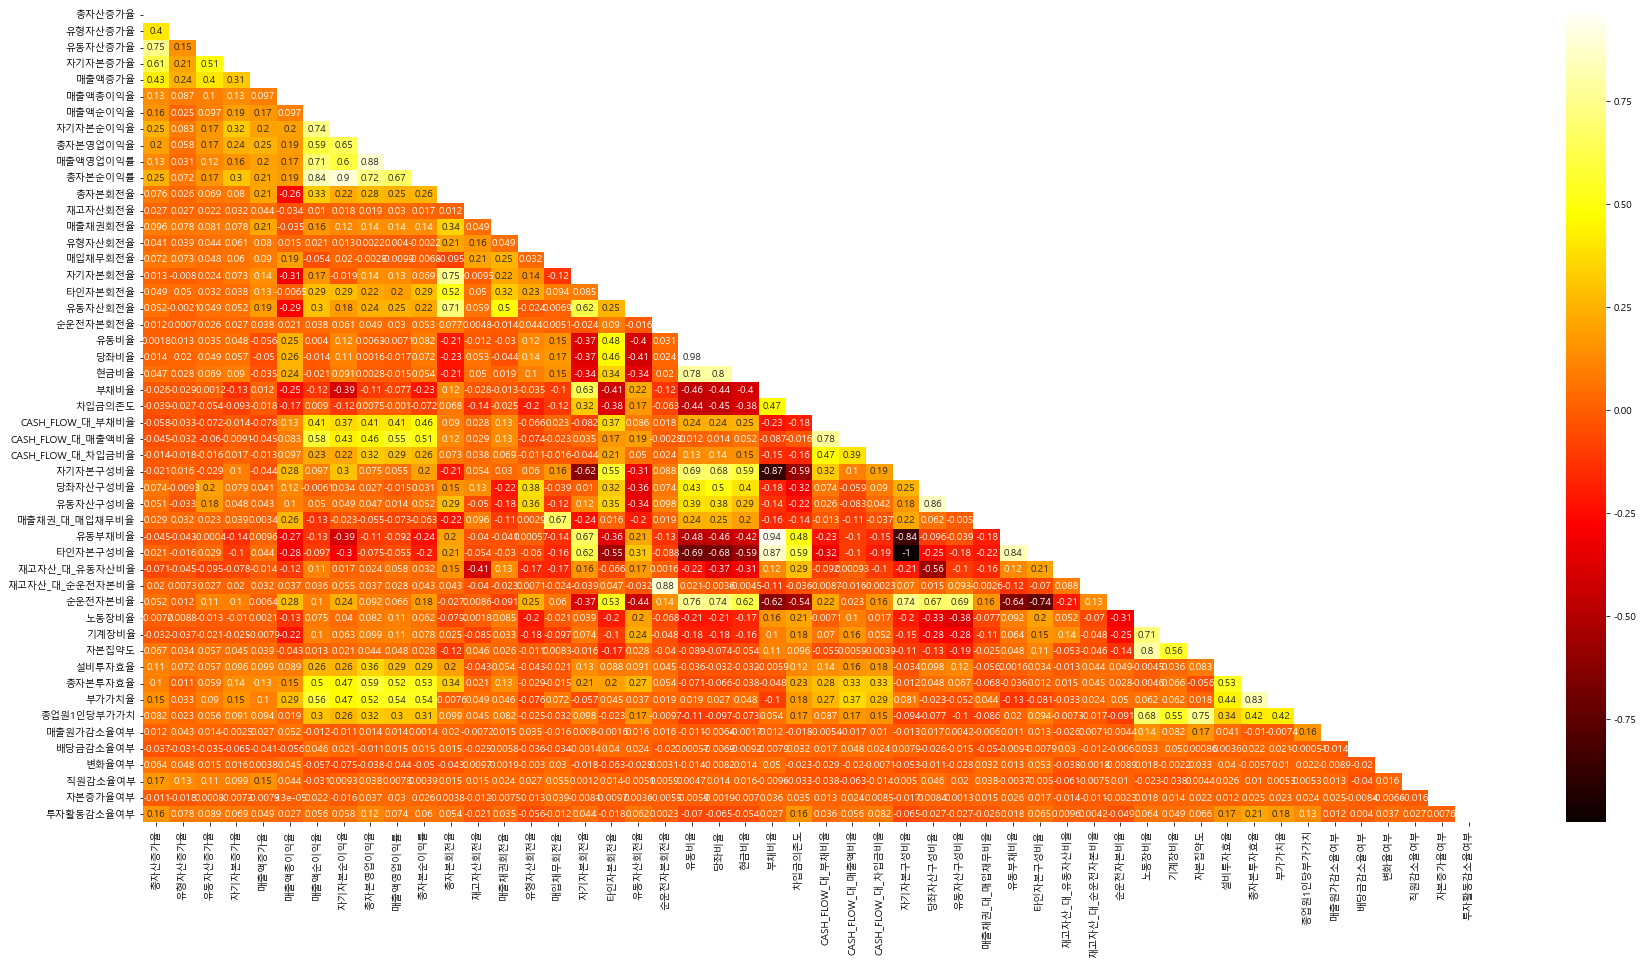

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,15))

sns.heatmap(ss_sc2.corr(),annot=True, cmap='hot',mask=mask)

In [210]:
ss_sc2 = ss_sc2.drop(['매출액영업이익률','총자본순이익률','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','자기자본구성비율','재고자산_대_순운전자본비율',
                      '자본집약도','부가가치율','CASH_FLOW_대_차입금비율','매입채무회전율',
                      'CASH_FLOW_대_매출액비율','총자본회전율'],axis=1)

# 자기자본구성비율 vs. 타인자본구성비율 : 완벽한 음의 상관관계 (일단 이거부터 둘 중 하나 짤라요)

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_sc2,i)for i in range(ss_sc2.shape[1])]
vif['features'] = ss_sc2.columns
# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,13.860106,타인자본구성비율
1,8.873770,순운전자본비율
2,7.858710,부채비율
3,7.797451,당좌자산구성비율
4,5.860426,자기자본회전율
5,5.033198,유동자산회전율
6,4.081826,타인자본회전율
7,4.016792,노동장비율
8,3.728214,자기자본순이익율
9,3.698119,총자산증가율


### 회귀분석

In [212]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = y1
feature = ss_sc2

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
# feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
#model = sm.OLS(target, feature)
model = sm.OLS(target, feature)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

# with open ('summary_with_const.csv', 'w') as fh:
#     fh.write(fitted_model.summary().as_csv())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  회생기업1   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              16.04
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                    3.19e-95
Time:                        12:30:18   Log-Likelihood:                          1670.5
No. Observations:                8592   AIC:                                     -3269.
Df Residuals:                    8556   BIC:                                     -3015.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
총자산증가율              -0.0099      0.004     -2.385      0.017      -0.018      -0.002
유형자산증가율             -0.0057      0.002     -2.319      0.020      -0.011      -0.001
유동자산증가율             -0.0005      0.004     -0.142      0.887      -0.008       0.007
자기자본증가율              0.0022      0.003      0.711      0.477      -0.004       0.008
매출액증가율               0.0159      0.003      6.171      0.000       0.011       0.021
매출액총이익율              0.0031      0.003      1.197      0.231      -0.002       0.008
매출액순이익율              0.0020      0.004      0.543      0.587      -0.005       0.009
자기자본순이익율             0.0065      0.004      1.566      0.117      -0.002       0.015
총자본영업이익율             0.0124      0.003      3.667      0.000       0.006       0.019
재고자산회전율              0.0017      0.002      0.693      0.488      -0.003       0.007
매출채권회전율             -0.0033      0.003     -1.222      0.222      -0.009       0.002
유형자산회전율             -0.0013      0.003     -0.532      0.595      -0.006       0.004
자기자본회전율              0.0034      0.005      0.651      0.515      -0.007       0.014
타인자본회전율              0.0063      0.004      1.440      0.150      -0.002       0.015
유동자산회전율             -0.0015      0.005     -0.306      0.760      -0.011       0.008
순운전자본회전율            -0.0028      0.002     -1.249      0.212      -0.007       0.002
유동비율                -0.0022      0.004     -0.543      0.587      -0.010       0.006
부채비율                 0.0016      0.006      0.268      0.788      -0.010       0.013
차입금의존도              -0.0002      0.003     -0.063      0.950      -0.006       0.006
CASH_FLOW_대_부채비율    -0.0080      0.003     -2.852      0.004      -0.013      -0.002
당좌자산구성비율             0.0007      0.006      0.125      0.901      -0.011       0.013
매출채권_대_매입채무비율       -0.0007      0.002     -0.287      0.774      -0.005       0.004
타인자본구성비율             0.0003      0.008      0.042      0.967      -0.015       0.016
재고자산_대_유동자산비율        0.0020      0.004      0.498      0.618      -0.006       0.010
순운전자본비율              0.0015      0.006      0.241      0.809      -0.011       0.014
노동장비율               -0.0038      0.004     -0.890      0.373      -0.012       0.005
기계장비율                0.0024      0.003      0.715      0.474      -0.004       0.009
설비투자효율              -0.0067      0.003     -2.501      0.012      -0.012      -0.001
총자본투자효율             -0.0036      0.004     -1.001      0.317      -0.011       0.003
종업원1인당부가가치           0.0044      0.004      1.093      0.275      -0.003       0.012
매출원가감소율여부            0.0405      0.030      1.354      0.176      -0.018       0.099
배당금감소율여부             0.1058      0.006     17.067      0.000       0.094       0.118
변화율여부    

### 후진제거법

In [213]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):

    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")

    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 

    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())

        if not changed:
            break

    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(30,10))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(x,y1)

                            OLS Regression Results                            
Dep. Variable:                  회생기업1   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     20.14
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.60e-23
Time:                        12:30:19   Log-Likelihood:                 1636.0
No. Observations:                8592   AIC:                            -3258.
Df Residuals:                    8585   BIC:                            -3209.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0470      0.003  

### 선정된 피쳐가 다중공선성을 띄는지 확인

In [214]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')

    return vif

vif(df1[['총자산증가율', '유형자산증가율', '매출액증가율', '자기자본순이익율', '매출액영업이익률',
       'CASH_FLOW_대_부채비율']])

,VIF Factor,features
0,1.697041,매출액영업이익률
1,1.572570,자기자본순이익율
2,1.478921,총자산증가율
3,1.316400,매출액증가율
4,1.252499,유형자산증가율
5,1.173507,CASH_FLOW_대_부채비율


### 릿지

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, ss_sc2, y1, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.042 -0.039 -0.037 -0.036 -0.042]
 5 folds 의 개별 RMSE scores :  [0.205 0.199 0.193 0.191 0.205]
 5 folds 의 평균 RMSE : 0.198 


In [216]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [5000,6000,7000,8000,9000]
coeff_lasso_df =get_linear_reg_eval('Ridge', params=lasso_alphas, X_data_n=ss_sc2, y_target_n=y1)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Ridge #######
alpha 5000일 때 5 폴드 세트의 평균 RMSE: 0.200 
alpha 6000일 때 5 폴드 세트의 평균 RMSE: 0.200 
alpha 7000일 때 5 폴드 세트의 평균 RMSE: 0.200 
alpha 8000일 때 5 폴드 세트의 평균 RMSE: 0.200 
alpha 9000일 때 5 폴드 세트의 평균 RMSE: 0.200 


,alpha:5000,alpha:6000,alpha:7000,alpha:8000,alpha:9000
배당금감소율여부,0.013239,0.011335,0.009911,0.008805,0.007922
매출액증가율,0.009115,0.008433,0.007852,0.007351,0.006914
총자본영업이익율,0.006171,0.005741,0.005384,0.005081,0.004820
자기자본순이익율,0.003968,0.003793,0.003638,0.003498,0.003372
매출액순이익율,0.002967,0.002929,0.002881,0.002826,0.002769
타인자본회전율,0.002885,0.002661,0.002480,0.002329,0.002202
자기자본회전율,0.002172,0.002069,0.001980,0.001900,0.001829
총자본투자효율,0.001499,0.001540,0.001562,0.001572,0.001573
종업원1인당부가가치,0.001487,0.001449,0.001417,0.001389,0.001362
기계장비율,0.001399,0.001316,0.001247,0.001187,0.001134


### 라쏘

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

lasso = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(lasso, ss_sc2, y1, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.043 -0.041 -0.037 -0.037 -0.043]
 5 folds 의 개별 RMSE scores :  [0.208 0.203 0.194 0.194 0.208]
 5 folds 의 평균 RMSE : 0.201 


In [218]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0,0.0006,0.0007,0.0008,0.0009,0.001]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=ss_sc2, y_target_n=y1)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.0006일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.0007일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.0008일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.0009일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.001일 때 5 폴드 세트의 평균 RMSE: 0.198 


,alpha:0,alpha:0.0006,alpha:0.0007,alpha:0.0008,alpha:0.0009,alpha:0.001
배당금감소율여부,0.083801,0.078292,0.077412,0.076537,0.075660,0.074777
매출원가감소율여부,0.020989,0.000000,0.000000,0.000000,0.000000,0.000000
변화율여부,0.017330,0.000000,0.000000,0.000000,0.000000,0.000000
매출액증가율,0.015878,0.015248,0.015092,0.014938,0.014786,0.014636
총자본영업이익율,0.012691,0.011762,0.011642,0.011529,0.011417,0.011304
직원감소율여부,0.008040,0.000000,0.000000,0.000000,0.000000,0.000000
타인자본회전율,0.006404,0.003571,0.003423,0.003219,0.002993,0.002774
자기자본순이익율,0.005398,0.004442,0.004359,0.004278,0.004201,0.004127
종업원1인당부가가치,0.004061,0.002580,0.002503,0.002422,0.002339,0.002252
자기자본회전율,0.003292,0.003139,0.003042,0.002925,0.002795,0.002655


In [219]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

# 이건 피처 계수들 봐서 수정하고
vif(df1[['자기자본순이익율', 'CASH_FLOW_대_차입금비율', '이자보상배율', '종업원1인당부가가치', '기계장비율',
         '재고자산_대_순운전자본비율','노동장비율', '당좌비율','자본집약도']])

,VIF Factor,features
0,6.089502,자본집약도
1,5.981689,노동장비율
2,3.912659,종업원1인당부가가치
3,2.830446,기계장비율
4,1.390776,당좌비율
5,1.212308,자기자본순이익율
6,1.193984,이자보상배율
7,1.184537,CASH_FLOW_대_차입금비율
8,1.010205,재고자산_대_순운전자본비율


### 엘라스틱

In [220]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0,0.001,0.002,0.003,0.004,0.005]
coeff_lasso_df =get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n=ss_sc2, y_target_n=y1)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.001일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.002일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.003일 때 5 폴드 세트의 평균 RMSE: 0.198 
alpha 0.004일 때 5 폴드 세트의 평균 RMSE: 0.199 
alpha 0.005일 때 5 폴드 세트의 평균 RMSE: 0.199 


,alpha:0,alpha:0.001,alpha:0.002,alpha:0.003,alpha:0.004,alpha:0.005
배당금감소율여부,0.083801,0.077201,0.070818,0.064544,0.058277,0.051963
매출원가감소율여부,0.020989,0.000000,0.000000,0.000000,0.000000,0.000000
변화율여부,0.017330,0.000000,0.000000,0.000000,0.000000,0.000000
매출액증가율,0.015878,0.015084,0.014072,0.013100,0.012251,0.011440
총자본영업이익율,0.012691,0.011634,0.010869,0.009933,0.009041,0.008431
직원감소율여부,0.008040,0.000000,0.000000,0.000000,0.000000,0.000000
타인자본회전율,0.006404,0.003425,0.001934,0.000712,0.000000,0.000000
자기자본순이익율,0.005398,0.004359,0.003818,0.003193,0.002537,0.001870
종업원1인당부가가치,0.004061,0.002499,0.001741,0.000891,0.000176,0.000000
자기자본회전율,0.003292,0.003040,0.002098,0.001546,0.001195,0.000824


In [221]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

# 이거도 피처 계수들 보고 수정하고
vif(ss_sc2[['배당금감소율여부', '매출액증가율', '타인자본회전율', '자기자본순이익율', '종업원1인당부가가치', '자기자본회전율',
'매출액순이익율', '유형자산증가율', '설비투자효율', '총자산증가율', 'CASH_FLOW_대_부채비율']])

,VIF Factor,features
0,2.604365,매출액순이익율
1,2.513311,자기자본순이익율
2,1.452329,총자산증가율
3,1.430238,CASH_FLOW_대_부채비율
4,1.313528,매출액증가율
5,1.251644,타인자본회전율
6,1.216969,종업원1인당부가가치
7,1.211008,유형자산증가율
8,1.196042,설비투자효율
9,1.158144,자기자본회전율


### 이 아래로는 머신러닝 ###

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

parameters = {
    'learning_rate' : [0.01, 0.1, 0.3], # 매개변수를 얼만큼 이동하면서 찾을까요
    'max_depth' : [5, 7, 10], # 트리의 깊이
    'subsample' : [0.5, 0.7, 1], # 모델을 학습할 때 일부 데이터만 써서 트리를 만듬. 0.5인 경우 데이터의 절반씩 랜덤 추출함. 오버피팅 방지도 좋음.
    'n_estimators' : [300, 500, 1000] # 전체 나무의 개수
}

model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, parameters, cv=TimeSeriesSplit(n_splits=6))

In [241]:
# 회계년도를 앞에서 건드렸다면 따로 뭐 하지 마세요

ml_df = ss_sc2.copy()
# ml_df['회계년도'] = df['회계년도']
# ml_df.sort_values(by='회계년도', inplace=True)
# ml_df.reset_index(drop=True, inplace=True)
#ml_df

In [242]:
# Best Feature 입력하세요

#ml_df.drop(columns=['회계년도'], inplace=True)
ml_df = ml_df[['배당금감소율여부', '매출액증가율', '자기자본순이익율', '종업원1인당부가가치', '자기자본회전율',
'매출액순이익율', '유형자산증가율', '설비투자효율', '총자산증가율', 'CASH_FLOW_대_부채비율']]

In [243]:
ml_df.columns

Index(['배당금감소율여부', '매출액증가율', '자기자본순이익율', '종업원1인당부가가치', '자기자본회전율', '매출액순이익율',
       '유형자산증가율', '설비투자효율', '총자산증가율', 'CASH_FLOW_대_부채비율'],
      dtype='object')

In [244]:
# K-Fold vs. TimeSeriesSplit?
X_train = ml_df[:5513]
y_train = y1[:5513]
X_test = ml_df[5513:]
y_test = y1[5513:]

gs_model.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=6, test_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]})

In [245]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

pred = gs_model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[2949,    0],
       [ 130,    0]], dtype=int64)

In [246]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2949
         1.0       0.00      0.00      0.00       130

    accuracy                           0.96      3079
   macro avg       0.48      0.50      0.49      3079
weighted avg       0.92      0.96      0.94      3079



In [247]:
y1.value_counts(normalize=True)*100

0.0    95.763501
1.0     4.236499
Name: 회생기업1, dtype: float64

In [248]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("Before : ", X_train.shape, y_train.shape)
print("After : ", X_train_over.shape, y_train_over.shape)
y_train_over.value_counts()

Before :  (5513, 10) (5513,)
After :  (10558, 10) (10558,)


0.0    5279
1.0    5279
Name: 회생기업1, dtype: int64

In [249]:
gs_model.fit(X_train_over, y_train_over)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=6, test_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]})

In [250]:
pred_over = gs_model.predict(X_test)
cm_over = confusion_matrix(y_test, pred_over)
cm_over

array([[2778,  171],
       [ 121,    9]], dtype=int64)

In [251]:
print(classification_report(y_test,pred_over))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      2949
         1.0       0.05      0.07      0.06       130

    accuracy                           0.91      3079
   macro avg       0.50      0.51      0.50      3079
weighted avg       0.92      0.91      0.91      3079



In [252]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=123)
model_lr.fit(X_train_over, y_train_over)
pred_lr = model_lr.predict(X_test)

In [253]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lr)

0.3731731081519974

In [254]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

         0.0       0.96      0.36      0.53      2949
         1.0       0.04      0.62      0.08       130

    accuracy                           0.37      3079
   macro avg       0.50      0.49      0.30      3079
weighted avg       0.92      0.37      0.51      3079

